In [22]:
import numpy as np
from matplotlib import pyplot as plt

Define the problem parameters


In [23]:
A = np.array([[1, 3], [3, 1]]) # low dimensions to plot it, you can test larger sizes
b = np.array([-1, 2])

lmbda = 0.5

The function to be minimized is $\frac{1}{2}\|Ax-b\|_2^2 + \lambda \|x\|_1$

In [24]:
f = lambda x: 0.5 * np.sum((A @ x - b) ** 2)
F = lambda x: f(x) + lmbda * np.sum(np.abs(x))

# derivative of f from matrix calculus
df = lambda x: A.T @ (A @ x - b)

Plot the function

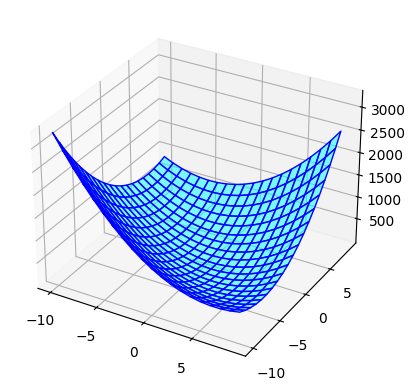

In [25]:
# this function has been prepared only for the visualization sake, no need to go through this but it renders some nice
# graphics :)
Fplot = lambda r1, r2: (r1 * A[0, 0] + r2 * A[0, 1] - b[0]) ** 2 + (r1 * A[1, 0] + r2 * A[1,1] - b[1]) ** 2 + lmbda * (np.abs(r1) + np.abs(r2))
xx, yy = np.meshgrid(np.arange(-10, 10, 1), np.arange(-10, 10, 1))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, Fplot(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1]);

ISTA with backtracking
----------------------------
Parameters of ISTA

In [26]:
MAX_ITER = 1e3
TOL_DIST_X = 1e-6
# parameter for backtracking
eta = 0.99

Initialization: test different inizializations, the function is convex, you always converge to the same solution

Main loop

In [27]:
def Soft(alpha, x):
    return np.sign(x) * np.maximum(0, np.abs(x) - alpha)

In [28]:
alphas = [1e-1]
xs = [np.array([-5, 10])]
ys = [xs[-1]]
cnt = 1
distanceX = np.inf

In [29]:
while cnt < MAX_ITER and distanceX > TOL_DIST_X:
    xs.append(Soft(eta * lmbda, ys[-1] - eta * df(ys[-1])))
    alphas.append(0.5 * (1 + np.sqrt(1 + 4 * alphas[-1] ** 2)))
    ys.append(xs[-1] + (alphas[-2] + 1) / alphas[-1] * (xs[-1] - xs[-2]))
    
    print(xs[-1], alphas[-1], ys[-1])

    cnt += 1
    distanceX = np.linalg.norm(xs[-1] - xs[-2])

[-5.4455  2.9215] 1.0099019513592786 [-5.93074513 -4.7885059 ]
[3.23056505 3.32647755] 1.6268992640690112 [13.949139    3.82679442]
[-1.5891245  -8.29702062] 2.2019991819705114 [ -7.33882642 -22.16340125]
[13.53717208  3.98912888] 2.758052346027169 [31.0982562  18.25290481]
[ -9.9867429  -18.33933513] 3.303007802954885 [-36.75147042 -43.74391834]
[26.06187279 21.24443425] 3.8406377454583214 [66.45034077 65.59364909]
[-37.75362415 -38.86506593] 4.373047674873003 [-108.39262153 -105.40180118]
[61.97024368 63.18269918] 4.901539045233177 [171.28715236 175.04705483]
[-101.72057905 -100.04359796] 5.426975239631854 [-279.72540476 -277.54327747]
[162.50895277 163.23295765] 5.9499596559586765 [447.92209113 447.61671854]
[-260.8606099  -261.63905495] 6.470931242908086 [-715.57126431 -717.96338226]
[419.76003642 417.72119718] 6.990219653481998 [1147.18639829 1143.80048859]
[-667.40112624 -670.0402157 ] 7.508078966730182 [-1824.37570348 -1827.65358897]
[1067.82797481 1065.25413197] 8.0247092814710

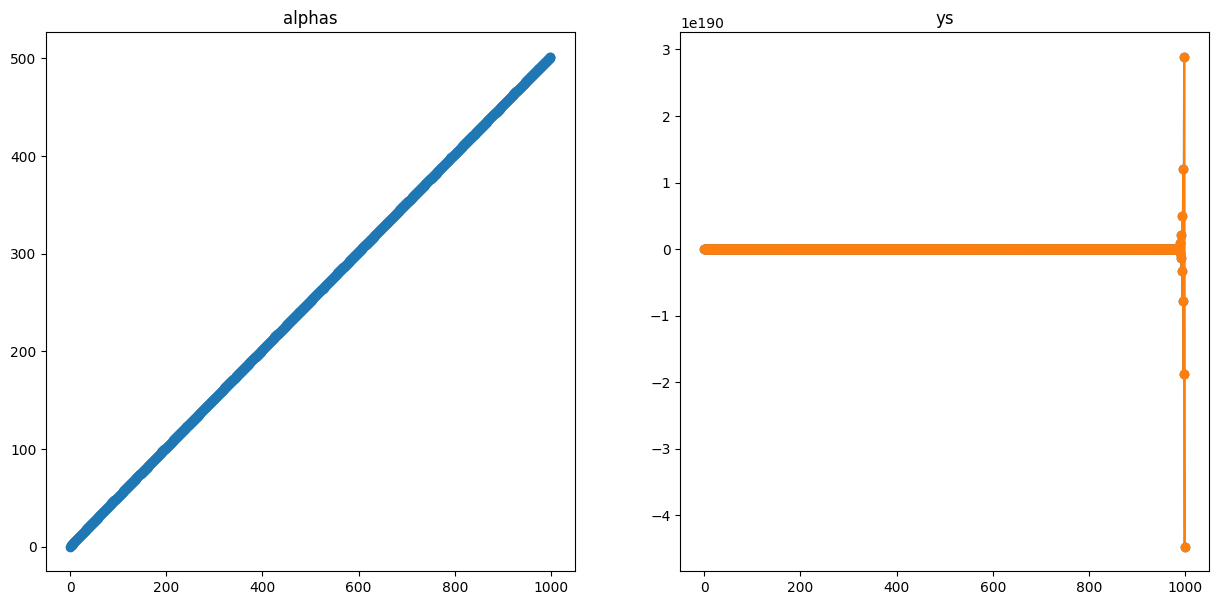

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].plot(alphas, 'o-')
ax[0].set_title('alphas')
ax[1].plot(ys, 'o-')
ax[1].set_title('ys')
plt.show()

Plot all the estimates

/var/folders/29/68f5_tk131x7cx496z5c3sxr0000gn/T/ipykernel_44567/3494362077.py:3: RuntimeWarning: overflow encountered in square
  Fplot = lambda r1, r2: (r1 * A[0, 0] + r2 * A[0, 1] - b[0]) ** 2 + (r1 * A[1, 0] + r2 * A[1,1] - b[1]) ** 2 + lmbda * (np.abs(r1) + np.abs(r2))
/var/folders/29/68f5_tk131x7cx496z5c3sxr0000gn/T/ipykernel_44567/3494362077.py:3: RuntimeWarning: overflow encountered in add
  Fplot = lambda r1, r2: (r1 * A[0, 0] + r2 * A[0, 1] - b[0]) ** 2 + (r1 * A[1, 0] + r2 * A[1,1] - b[1]) ** 2 + lmbda * (np.abs(r1) + np.abs(r2))
/Users/giacomocartechini/poli/m3ip/m3ip-homework/venv/lib/python3.12/site-packages/matplotlib/ticker.py:2096: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
/Users/giacomocartechini/poli/m3ip/m3ip-homework/venv/lib/python3.12/site-packages/matplotlib/ticker.py:733: RuntimeWarning: overflow encountered in scalar power
  if abs_min // 10 ** oom != abs_max // 10 ** oom)
/Users/giacomocartechini/poli/m3ip/m3ip-ho

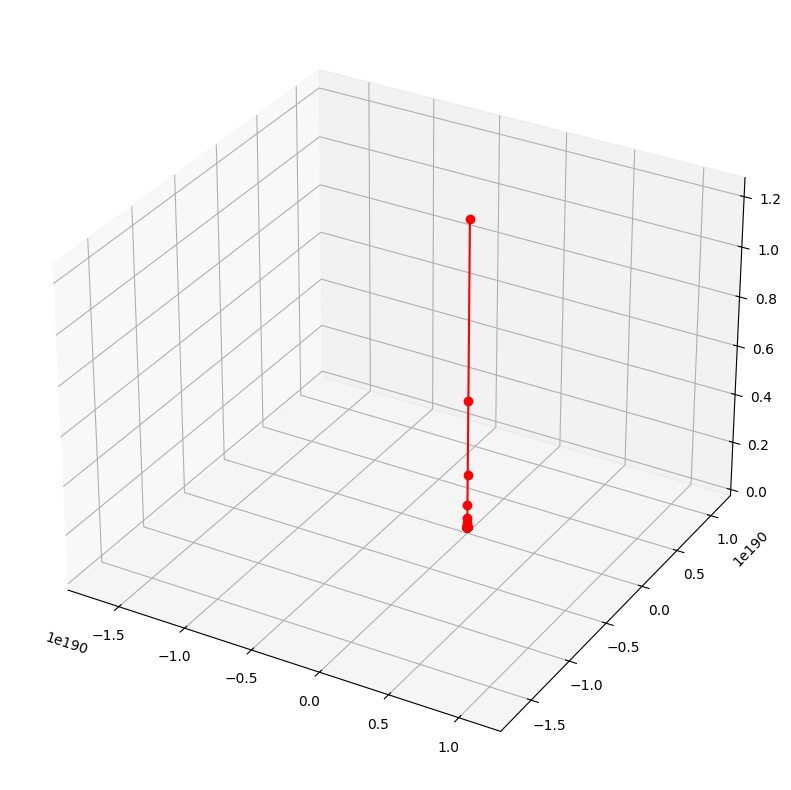

In [32]:
# plot the new estimate
xxplot = [x[0] for x in xs]
yyplot = [x[1] for x in xs]
zzplot = Fplot(np.array(xxplot), np.array(yyplot))

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, Fplot(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])
ax.plot3D(xxplot, yyplot, zzplot, 'r-o');

Compare the number of iteration needed for convergence with backtracking with the number of iteration required using the optimal alpha

In [ ]:
print(f'nr of iteration of ISTA with backtracking (before stopping criteria met): {cnt}\n')
print(f'Solution of ISTA: [{x_current[0]:.4f}, {x_current[1]:.4f}]\n')
print(f'Value of the functional: {F(x_current):.4f}\n')

nr of iteration of ISTA with backtracking (before stopping criteria met): 210



NameError: name 'x_current' is not defined

FISTA
-----
Parameters of FISTA

In [ ]:
MAX_ITER = 1e3
TOL_DIST_X = 1e-6
# set the optimal value for alpha
# alpha =

Initialization: test different inizializations, the function is convex, you always converge to the same solution

In [ ]:
# initialize x
# x =

# initialize y
# y =

# initialize gamma
# gamma =

grad_norm = 1e10
distanceX = 1e10

# initialize the list with all the estimates
all_x = [x]



Main loop

In [ ]:
cnt = 0
while :
    # compute the argument of the proximal operator

    # perform soft thresholding of x

    # update gamma

    # update y

    # compute the stopping criteria

    # store the estimate


Plot all the estimates

In [ ]:
# plot the new estimate
xxplot = [x[0] for x in all_x]
yyplot = [x[1] for x in all_x]
zzplot = Fplot(np.array(xxplot), np.array(yyplot))

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, Fplot(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])
ax.plot3D(xxplot, yyplot, zzplot, 'r-o')

In [ ]:
print(f'nr of iteration of FISTA (before stopping criteria met): {cnt}\n')
print(f'Solution of FISTA: [{x_current[0]:.4f}, {x_current[1]:.4f}]\n')
print(f'Value of the functional: {F(x_current):.4f}\n')